In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# GDP

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
co2 = pd.read_csv('co2.csv')

co2.head(3)

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0


In [38]:
gdp = pd.read_csv('gdp_clean.csv')
gdp.head(3)
sel = gdp['Entity'] != 'World'
x = gdp[sel]


In [39]:
dataframe = x.rename(columns={'Country Name' : 'Entity'})

In [40]:
dataframe

,Entity,GDP
0,Afghanistan,2.146437e+10
1,Albania,1.160662e+10
2,Algeria,1.628369e+11
3,Angola,3.792500e+10
4,Argentina,2.595960e+11
...,...,...
172,Western Offshoots (MPD),8.061099e+12
174,Yemen,4.583473e+10
175,Yugoslavia,1.339219e+11
176,Zambia,1.571914e+10


In [41]:
sel = co2['Year'] >= 1960
df = co2[sel]

In [42]:
data = df.groupby(df['Entity'])['Annual CO₂ emissions'].mean()
data.to_frame().reset_index()

,Entity,Annual CO₂ emissions
0,Afghanistan,3.486353e+06
1,Africa,7.461897e+08
2,Africa (GCP),7.461833e+08
3,Albania,4.500499e+06
4,Algeria,7.756944e+07
...,...,...
249,Wallis and Futuna,2.415722e+04
250,World,2.321133e+10
251,Yemen,1.023642e+07
252,Zambia,3.572136e+06


In [43]:
merge = pd.merge(data, dataframe, on='Entity', how='inner')
merge

,Entity,Annual CO₂ emissions,GDP
0,Afghanistan,3.486353e+06,2.146437e+10
1,Albania,4.500499e+06,1.160662e+10
2,Algeria,7.756944e+07,1.628369e+11
3,Angola,1.053226e+07,3.792500e+10
4,Argentina,1.244027e+08,2.595960e+11
...,...,...,...
159,Venezuela,1.126351e+08,1.214619e+11
160,Vietnam,7.185290e+07,1.600124e+11
161,Yemen,1.023642e+07,4.583473e+10
162,Zambia,3.572136e+06,1.571914e+10


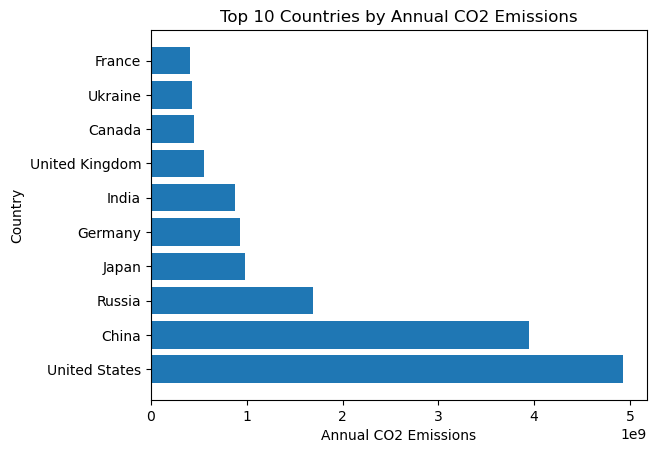

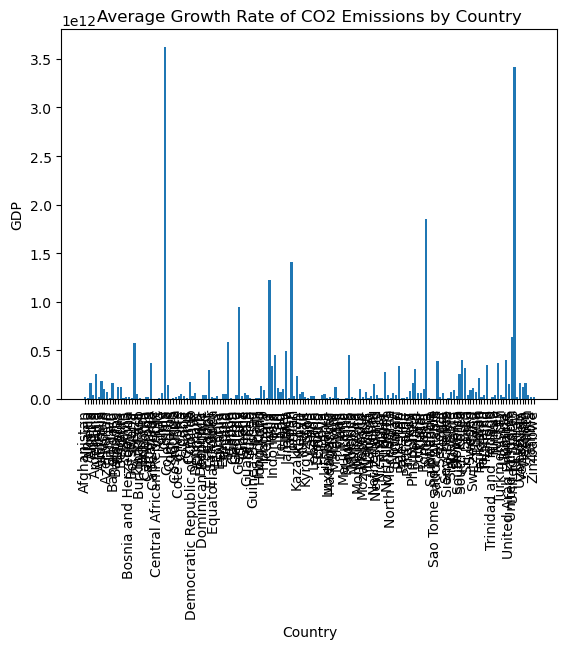

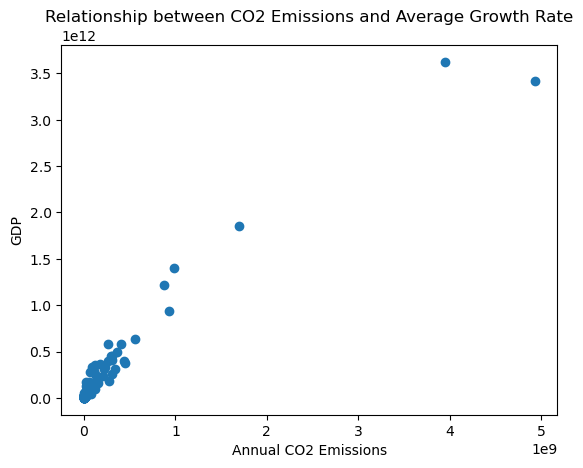

In [44]:
# Análisis de los países con mayores emisiones
top_emissions = merge.nlargest(10, "Annual CO₂ emissions")
plt.barh(top_emissions["Entity"], top_emissions["Annual CO₂ emissions"])
plt.xlabel("Annual CO2 Emissions")
plt.ylabel("Country")
plt.title("Top 10 Countries by Annual CO2 Emissions")
plt.show()

# Tendencias de crecimiento
plt.bar(merge["Entity"], merge["GDP"])
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("GDP")
plt.title("Average Growth Rate of CO2 Emissions by Country")
plt.show()

# Relación entre emisiones y crecimiento
plt.scatter(merge["Annual CO₂ emissions"], merge["GDP"])
plt.xlabel("Annual CO2 Emissions")
plt.ylabel("GDP")
plt.title("Relationship between CO2 Emissions and Average Growth Rate")
plt.show()

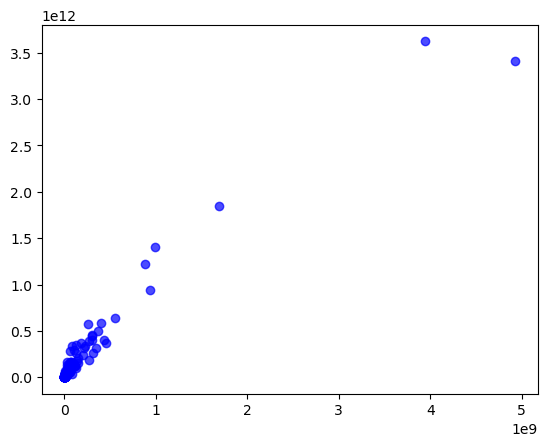

In [45]:
plt.scatter(merge["Annual CO₂ emissions"], merge["GDP"], color='blue', alpha=0.7)
